In [216]:
# ==========================================
# IMPORTS POUR PROJET FOOTBALL PLAYER VALUE
# ==========================================

# Manipulation de données
import pandas as pd
import numpy as np

# Web scraping
import requests
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.common.by import By

# Visualisation
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# Compatibility shim for matplotlib versions that don't expose get_data_path
import os
try:
	if not hasattr(mpl, 'get_data_path'):
		pkg_path = os.path.dirname(mpl.__file__)
		mpl.get_data_path = lambda: os.path.join(pkg_path, 'mpl-data')
except Exception:
	# Silently ignore if get_data_path setup fails
	pass

%matplotlib inline

# Machine Learning
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import xgboost as xgb

# Utilitaires
import warnings
warnings.filterwarnings('ignore')
import time
from datetime import datetime

# Configuration
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
sns.set_style('whitegrid')

print("✅ Toutes les bibliothèques sont importées avec succès!")

✅ Toutes les bibliothèques sont importées avec succès!


In [217]:
print('h')

h


In [218]:
import pandas as pd
df = pd.read_csv(r"C:\Users\ASUS\OneDrive\Apps\Documents\fifa_players.csv", encoding='latin1',sep=';')
print(df.head())

           name                       full_name  birth_date  age  height_cm  \
0      L. Messi  Lionel Andrés Messi Cuccittini   6/24/1987   31     170.18   
1    C. Eriksen    Christian  Dannemann Eriksen   2/14/1992   27     154.94   
2      P. Pogba                      Paul Pogba   3/15/1993   25     190.50   
3    L. Insigne                 Lorenzo Insigne  06/04/1991   27     162.56   
4  K. Koulibaly               Kalidou Koulibaly   6/20/1991   27     187.96   

   weight_kgs  positions nationality  overall_rating  potential   value_euro  \
0        72.1   CF,RW,ST   Argentina              94         94  110500000.0   
1        76.2  CAM,RM,CM     Denmark              88         89   69500000.0   
2        83.9     CM,CAM      France              88         91   73000000.0   
3        59.0      LW,ST       Italy              88         88   62000000.0   
4        88.9         CB     Senegal              88         91   60000000.0   

   wage_euro preferred_foot  international_r

In [219]:
print(df.columns)

Index(['name', 'full_name', 'birth_date', 'age', 'height_cm', 'weight_kgs',
       'positions', 'nationality', 'overall_rating', 'potential', 'value_euro',
       'wage_euro', 'preferred_foot', 'international_reputation(1-5)',
       'weak_foot(1-5)', 'skill_moves(1-5)', 'body_type',
       'release_clause_euro', 'national_team', 'national_rating',
       'national_team_position', 'national_jersey_number', 'crossing',
       'finishing', 'heading_accuracy', 'short_passing', 'volleys',
       'dribbling', 'curve', 'freekick_accuracy', 'long_passing',
       'ball_control', 'acceleration', 'sprint_speed', 'agility', 'reactions',
       'balance', 'shot_power', 'jumping', 'stamina', 'strength', 'long_shots',
       'aggression', 'interceptions', 'positioning', 'vision', 'penalties',
       'composure', 'marking', 'standing_tackle', 'sliding_tackle'],
      dtype='object')


In [220]:
print(df.shape)

(17954, 51)


In [221]:
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17954 entries, 0 to 17953
Data columns (total 51 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   name                           17954 non-null  object 
 1   full_name                      17954 non-null  object 
 2   birth_date                     17954 non-null  object 
 3   age                            17954 non-null  int64  
 4   height_cm                      17954 non-null  float64
 5   weight_kgs                     17954 non-null  float64
 6   positions                      17954 non-null  object 
 7   nationality                    17954 non-null  object 
 8   overall_rating                 17954 non-null  int64  
 9   potential                      17954 non-null  int64  
 10  value_euro                     17699 non-null  float64
 11  wage_euro                      17708 non-null  float64
 12  preferred_foot                 17954 non-null 

In [222]:
print(df.dtypes)

name                              object
full_name                         object
birth_date                        object
age                                int64
height_cm                        float64
weight_kgs                       float64
positions                         object
nationality                       object
overall_rating                     int64
potential                          int64
value_euro                       float64
wage_euro                        float64
preferred_foot                    object
international_reputation(1-5)      int64
weak_foot(1-5)                     int64
skill_moves(1-5)                   int64
body_type                         object
release_clause_euro              float64
national_team                     object
national_rating                  float64
national_team_position            object
national_jersey_number           float64
crossing                           int64
finishing                          int64
heading_accuracy

In [223]:
print(df.isnull().sum())


name                                 0
full_name                            0
birth_date                           0
age                                  0
height_cm                            0
weight_kgs                           0
positions                            0
nationality                          0
overall_rating                       0
potential                            0
value_euro                         255
wage_euro                          246
preferred_foot                       0
international_reputation(1-5)        0
weak_foot(1-5)                       0
skill_moves(1-5)                     0
body_type                            0
release_clause_euro               1837
national_team                    17097
national_rating                  17097
national_team_position           17097
national_jersey_number           17097
crossing                             0
finishing                            0
heading_accuracy                     0
short_passing            

In [224]:
df=df.drop(columns=["national_jersey_number", "national_team_position","release_clause_euro"])


In [225]:
#df=df.drop(columns=["national_team"])

In [226]:
k = df['value_euro'].median()
print(k)


700000.0


In [227]:
print(df.duplicated().sum())

0


In [228]:
df['national_rating'] = df['national_rating'].fillna(df['national_rating'].mean())


In [229]:
print(df.columns)

Index(['name', 'full_name', 'birth_date', 'age', 'height_cm', 'weight_kgs',
       'positions', 'nationality', 'overall_rating', 'potential', 'value_euro',
       'wage_euro', 'preferred_foot', 'international_reputation(1-5)',
       'weak_foot(1-5)', 'skill_moves(1-5)', 'body_type', 'national_team',
       'national_rating', 'crossing', 'finishing', 'heading_accuracy',
       'short_passing', 'volleys', 'dribbling', 'curve', 'freekick_accuracy',
       'long_passing', 'ball_control', 'acceleration', 'sprint_speed',
       'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina',
       'strength', 'long_shots', 'aggression', 'interceptions', 'positioning',
       'vision', 'penalties', 'composure', 'marking', 'standing_tackle',
       'sliding_tackle'],
      dtype='object')


In [230]:
from scipy.stats import trim_mean

trimmed_mean = trim_mean(df['wage_euro'].dropna(), 0.1)
rimmed_mean = trim_mean(df['value_euro'].dropna(), 0.1)


df['wage_euro'] = df['wage_euro'].fillna(trimmed_mean)
df['value_euro']=df['value_euro'].fillna(rimmed_mean)


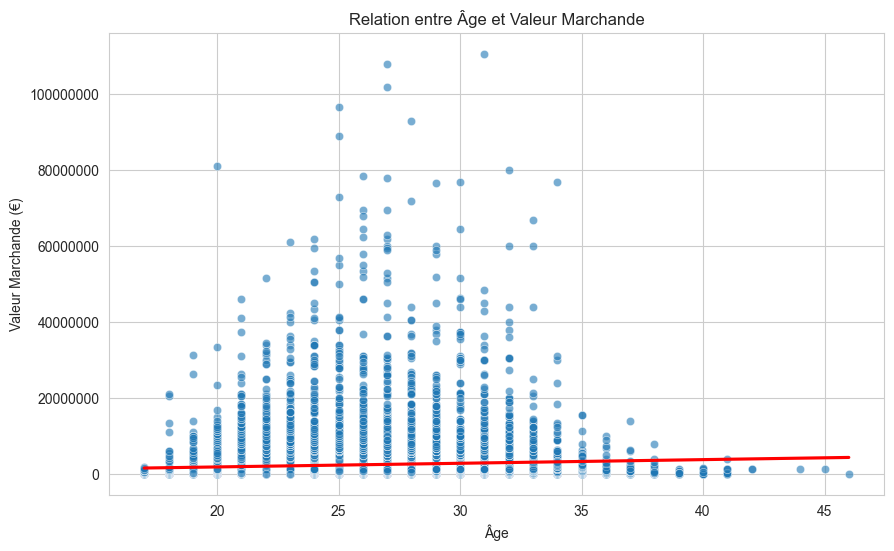

In [231]:
# Variables Démographiques
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='age', y='value_euro', alpha=0.6)
sns.regplot(data=df, x='age', y='value_euro', scatter=False, color='red')
plt.title('Relation entre Âge et Valeur Marchande')
plt.xlabel('Âge')
plt.ylabel('Valeur Marchande (€)')
plt.ticklabel_format(style='plain', axis='y')
plt.show()

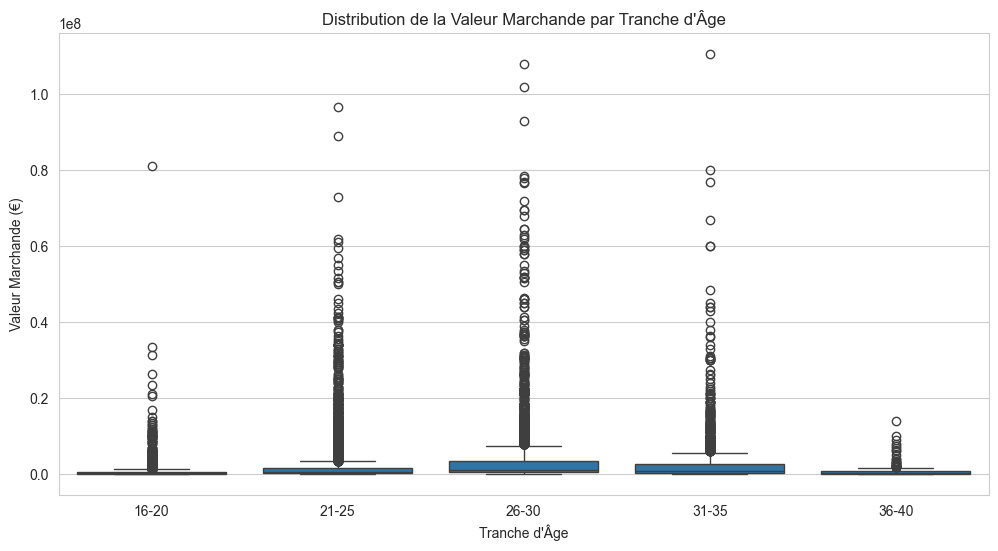

In [232]:
# Créer des tranches d'âge
df['age_group'] = pd.cut(df['age'], bins=[15, 20, 25, 30, 35, 40], 
                          labels=['16-20', '21-25', '26-30', '31-35', '36-40'])

plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='age_group', y='value_euro')
plt.title('Distribution de la Valeur Marchande par Tranche d\'Âge')
plt.xlabel('Tranche d\'Âge')
plt.ylabel('Valeur Marchande (€)')
plt.show()

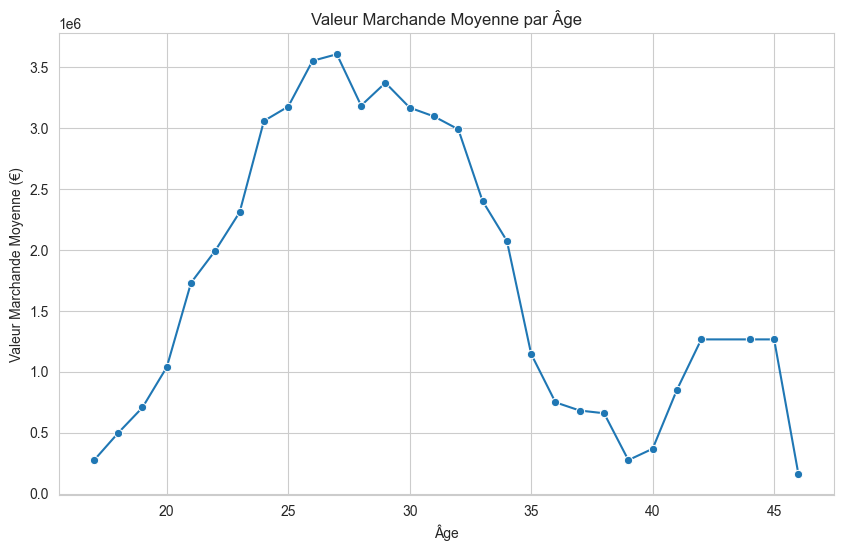

In [233]:
plt.figure(figsize=(10, 6))
age_value = df.groupby('age')['value_euro'].mean().reset_index()
sns.lineplot(data=age_value, x='age', y='value_euro', marker='o')
plt.title('Valeur Marchande Moyenne par Âge')
plt.xlabel('Âge')
plt.ylabel('Valeur Marchande Moyenne (€)')
plt.show()

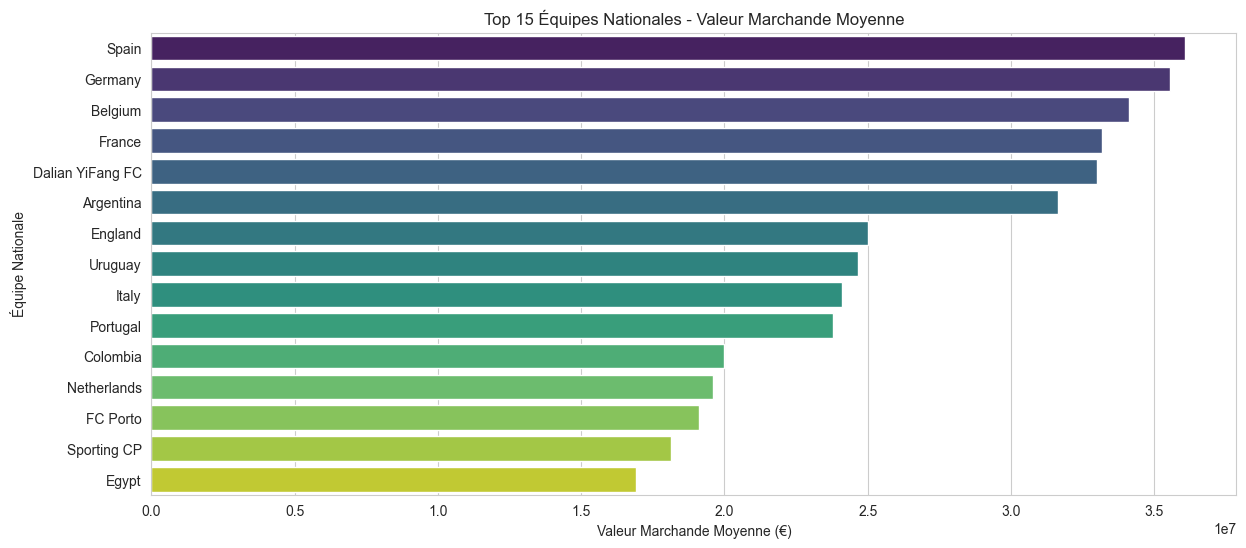

In [234]:
# Top 15 équipes nationales par valeur moyenne
plt.figure(figsize=(14, 6))
top_nations = df.groupby('national_team')['value_euro'].mean().sort_values(ascending=False).head(15)
sns.barplot(x=top_nations.values, y=top_nations.index, palette='viridis')
plt.title('Top 15 Équipes Nationales - Valeur Marchande Moyenne')
plt.xlabel('Valeur Marchande Moyenne (€)')
plt.ylabel('Équipe Nationale')
plt.show()

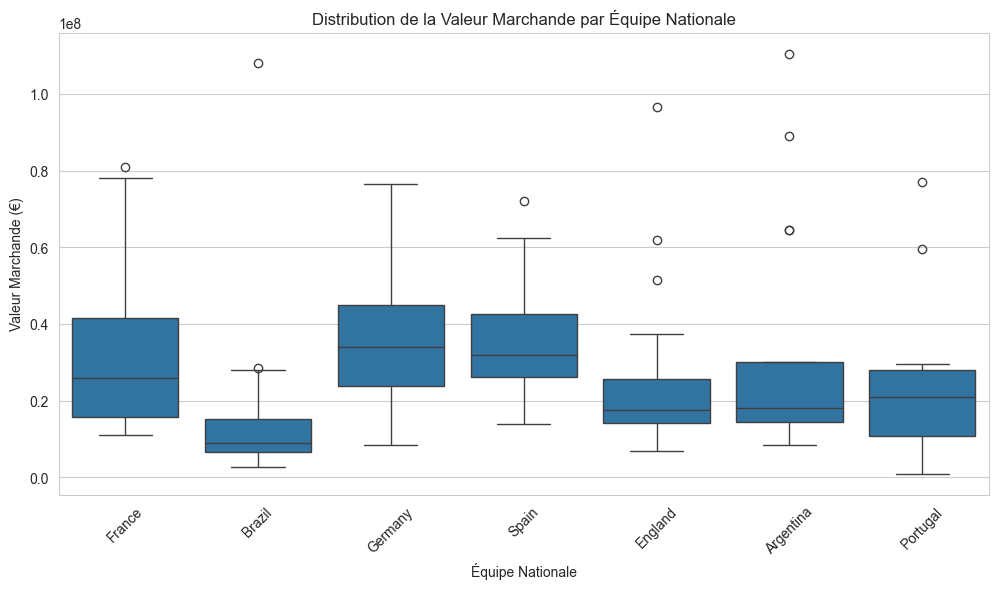

In [235]:
# Sélectionner quelques équipes nationales majeures
major_teams = ['France', 'Brazil', 'Germany', 'Spain', 'England', 'Argentina', 'Portugal']
df_major = df[df['national_team'].isin(major_teams)]

plt.figure(figsize=(12, 6))
sns.boxplot(data=df_major, x='national_team', y='value_euro', order=major_teams)
plt.title('Distribution de la Valeur Marchande par Équipe Nationale')
plt.xlabel('Équipe Nationale')
plt.ylabel('Valeur Marchande (€)')
plt.xticks(rotation=45)
plt.show()

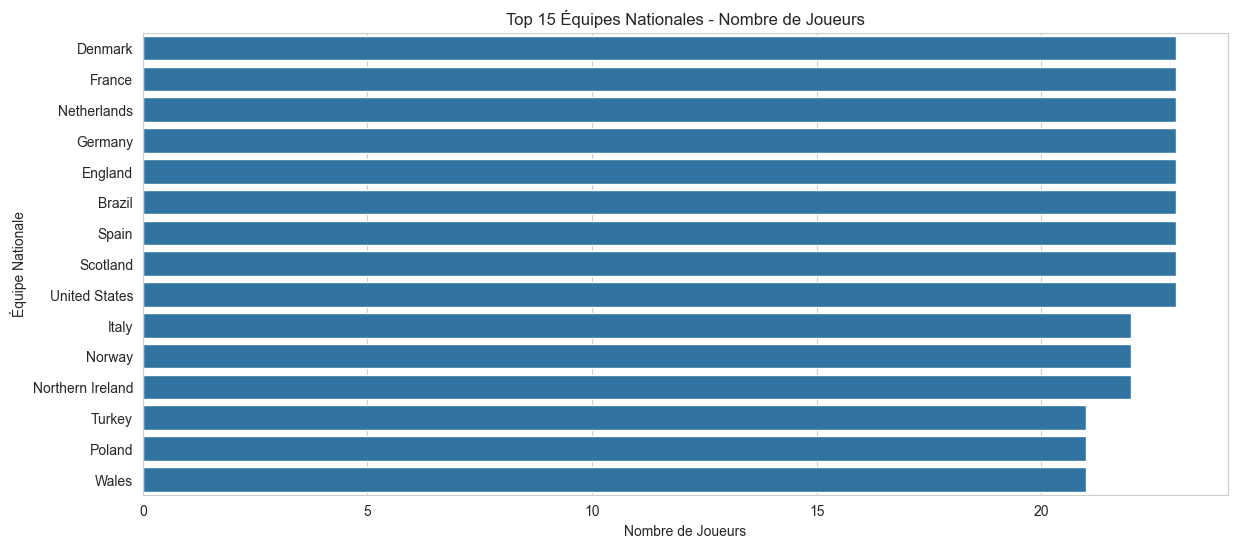

In [236]:
plt.figure(figsize=(14, 6))
top_nations_count = df['national_team'].value_counts().head(15)
sns.barplot(x=top_nations_count.values, y=top_nations_count.index)
plt.title('Top 15 Équipes Nationales - Nombre de Joueurs')
plt.xlabel('Nombre de Joueurs')
plt.ylabel('Équipe Nationale')
plt.show()

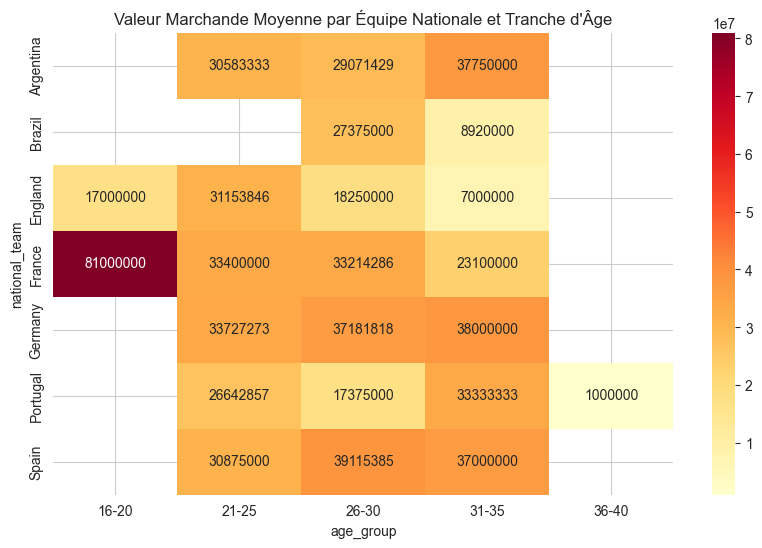

In [237]:
# Pour les équipes nationales principales
pivot_table = df[df['national_team'].isin(major_teams)].pivot_table(
    values='value_euro', 
    index='national_team', 
    columns='age_group', 
    aggfunc='mean'
)

plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, fmt='.0f', cmap='YlOrRd')
plt.title('Valeur Marchande Moyenne par Équipe Nationale et Tranche d\'Âge')
plt.show()

In [238]:
print(df.groupby('age')['value_euro'].describe())
print(df.groupby('national_team')['value_euro'].describe())

      count          mean           std           min           25%  \
age                                                                   
17    163.0  2.731902e+05  3.145606e+05  4.000000e+04  9.000000e+04   
18    509.0  4.987556e+05  1.601278e+06  4.000000e+04  1.100000e+05   
19    957.0  7.076418e+05  1.845834e+06  4.000000e+04  1.400000e+05   
20   1145.0  1.038611e+06  3.229583e+06  3.000000e+04  1.800000e+05   
21   1347.0  1.731735e+06  3.810815e+06  3.000000e+04  2.150000e+05   
22   1360.0  1.996131e+06  4.143926e+06  3.000000e+04  2.900000e+05   
23   1315.0  2.310351e+06  4.863236e+06  4.000000e+04  3.500000e+05   
24   1303.0  3.059662e+06  6.122072e+06  4.000000e+04  4.750000e+05   
25   1304.0  3.177656e+06  7.002411e+06  3.000000e+04  5.000000e+05   
26   1248.0  3.552869e+06  7.154437e+06  3.000000e+04  5.500000e+05   
27   1318.0  3.607211e+06  8.002271e+06  2.000000e+04  5.500000e+05   
28   1118.0  3.185436e+06  6.076521e+06  2.000000e+04  5.250000e+05   
29    

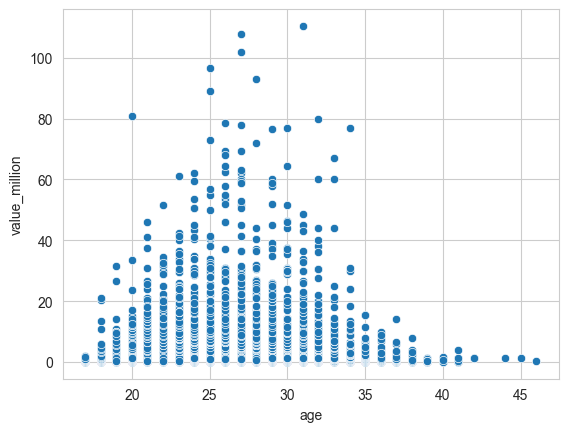

In [239]:
df["value_million"] = df["value_euro"] / 1_000_000

sns.scatterplot(data=df, x="age", y="value_million")
plt.show()


In [240]:
correlation = df['age'].corr(df['value_million'])
print(f"Corrélation âge-valeur: {correlation:.3f}")

Corrélation âge-valeur: 0.080


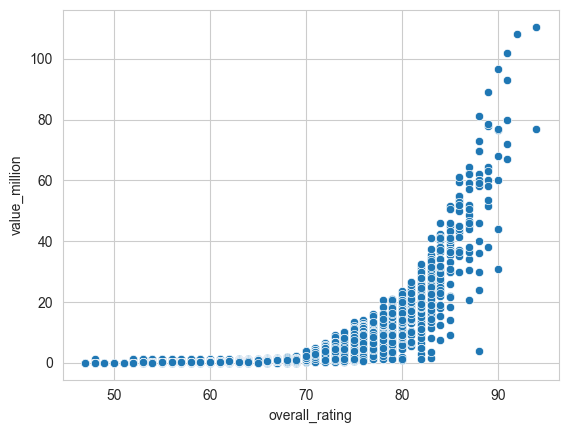

In [241]:

sns.scatterplot(data=df, x="overall_rating", y="value_million")
plt.show()


In [242]:
correlation = df['overall_rating'].corr(df['value_million'])
print(f"Corrélation overall_rating-valeur: {correlation:.3f}")

Corrélation overall_rating-valeur: 0.627


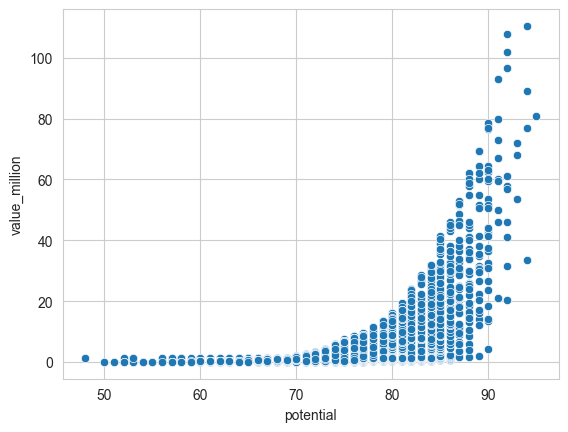

In [243]:
sns.scatterplot(data=df, x="potential", y="value_million")
plt.show()

In [244]:
correlation = df['potential'].corr(df['value_million'])
print(f"Corrélation potential-valeur: {correlation:.3f}")

Corrélation potential-valeur: 0.573


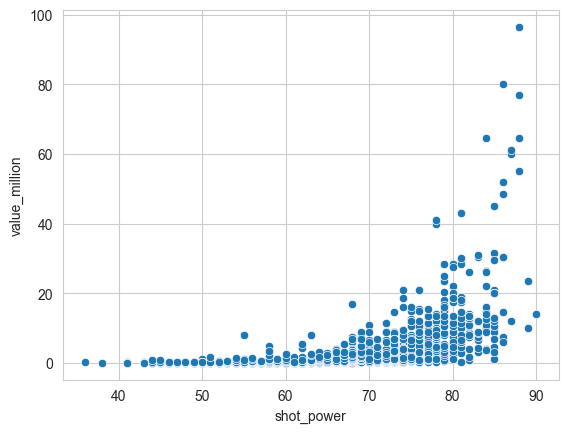

In [245]:
attackers = df[df['positions'].isin(['ST', 'CF', 'LW', 'RW'])]
sns.scatterplot(data=attackers, x="shot_power", y="value_million")
plt.show()

In [246]:
correlation = attackers['shot_power'].corr(attackers['value_million'])
print(f"Corrélation shut_power-valeur: {correlation:.3f}")

Corrélation shut_power-valeur: 0.490


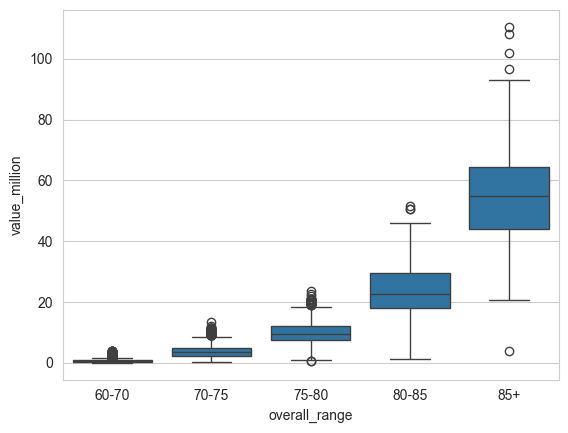

In [247]:
df['overall_range'] = pd.cut(df['overall_rating'], 
                              bins=[0, 70, 75, 80, 85, 100],
                              labels=['60-70', '70-75', '75-80', '80-85', '85+'])
sns.boxplot(data=df,x='overall_range', y='value_million')
plt.show()

In [248]:
correlation = df['overall_rating'].corr(df['value_million'])
print(f"Corrélation overall_rating-valeur: {correlation:.3f}")

Corrélation overall_rating-valeur: 0.627


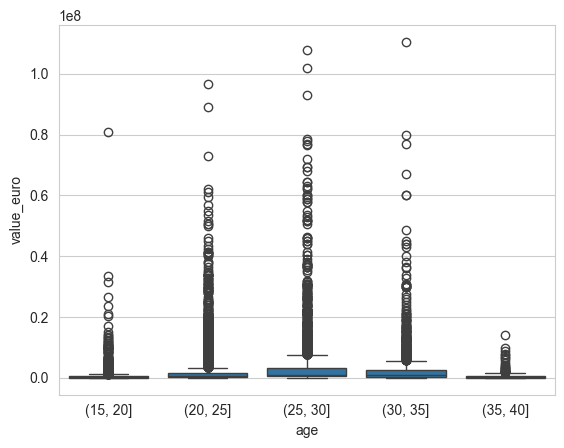

In [249]:

# Par Âge
age_gp=pd.cut(df['age'], bins=[15, 20,25,30,35,40])
sns.boxplot(data=df, x=age_gp, y='value_euro')
plt.show()

In [250]:
print(df.columns)

Index(['name', 'full_name', 'birth_date', 'age', 'height_cm', 'weight_kgs',
       'positions', 'nationality', 'overall_rating', 'potential', 'value_euro',
       'wage_euro', 'preferred_foot', 'international_reputation(1-5)',
       'weak_foot(1-5)', 'skill_moves(1-5)', 'body_type', 'national_team',
       'national_rating', 'crossing', 'finishing', 'heading_accuracy',
       'short_passing', 'volleys', 'dribbling', 'curve', 'freekick_accuracy',
       'long_passing', 'ball_control', 'acceleration', 'sprint_speed',
       'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina',
       'strength', 'long_shots', 'aggression', 'interceptions', 'positioning',
       'vision', 'penalties', 'composure', 'marking', 'standing_tackle',
       'sliding_tackle', 'age_group', 'value_million', 'overall_range'],
      dtype='object')


In [251]:
#- Quelle position a la valeur médiane la plus élevée ?
#- Quelle position a la plus grande variance de valeur ?
#- Y a-t-il des outliers significatifs par position ?

In [252]:
print(df['positions'].isnull().sum())


0


In [253]:
def categorize_position(pos):
    if pd.isna(pos):
        return 'other'
    
    positions = pos.split(',')  # séparer CF,LW,LF → ['CF','LW','LF']
    
    attackers = {'CF', 'ST', 'LW', 'RW', 'LF', 'RF'}
    midfielders = {'CDM', 'CM', 'CAM', 'LM', 'RM'}
    defenders = {'CB', 'LB', 'RB', 'LWB', 'RWB'}
    
    # Priorité
    if any(p in attackers for p in positions):
        return 'attacker'
    elif any(p in midfielders for p in positions):
        return 'midfielder'
    elif any(p in defenders for p in positions):
        return 'defender'
    elif 'GK' in positions:
        return 'goalkeeper'
    else:
        return 'other'



# Apply the function to create a new column
df['position_category'] = df['positions'].apply(categorize_position)

# Verify the result
print(df[['positions', 'position_category']].head(10))

   positions position_category
0   CF,RW,ST          attacker
1  CAM,RM,CM        midfielder
2     CM,CAM        midfielder
3      LW,ST          attacker
4         CB          defender
5         CB          defender
6   RW,ST,RM          attacker
7         ST          attacker
8         GK        goalkeeper
9         ST          attacker


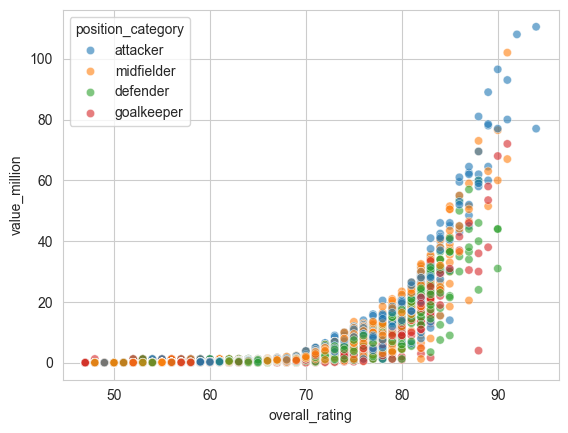

In [254]:
scatter = sns.scatterplot(data=df, x='overall_rating', y='value_million', hue='position_category', alpha=0.6)
plt.show()

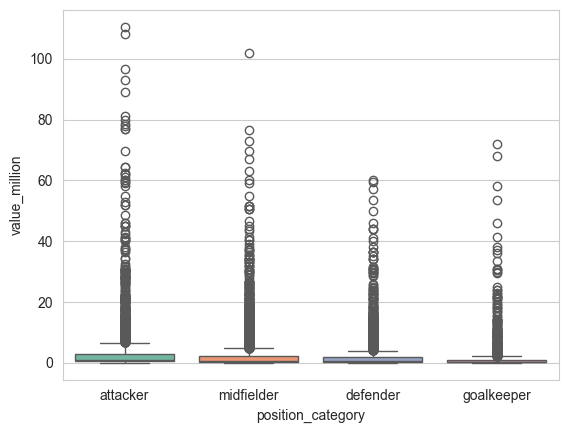

In [255]:
box = sns.boxplot(data=df, x='position_category', y='value_million', palette='Set2')
plt.show()

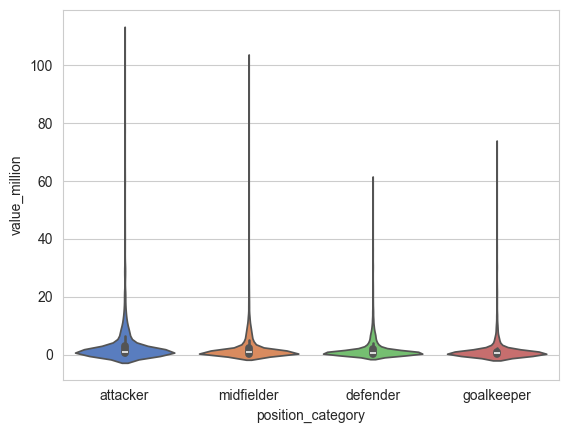

In [256]:
sns.violinplot(data=df, x='position_category', y='value_million', palette='muted')
plt.show()

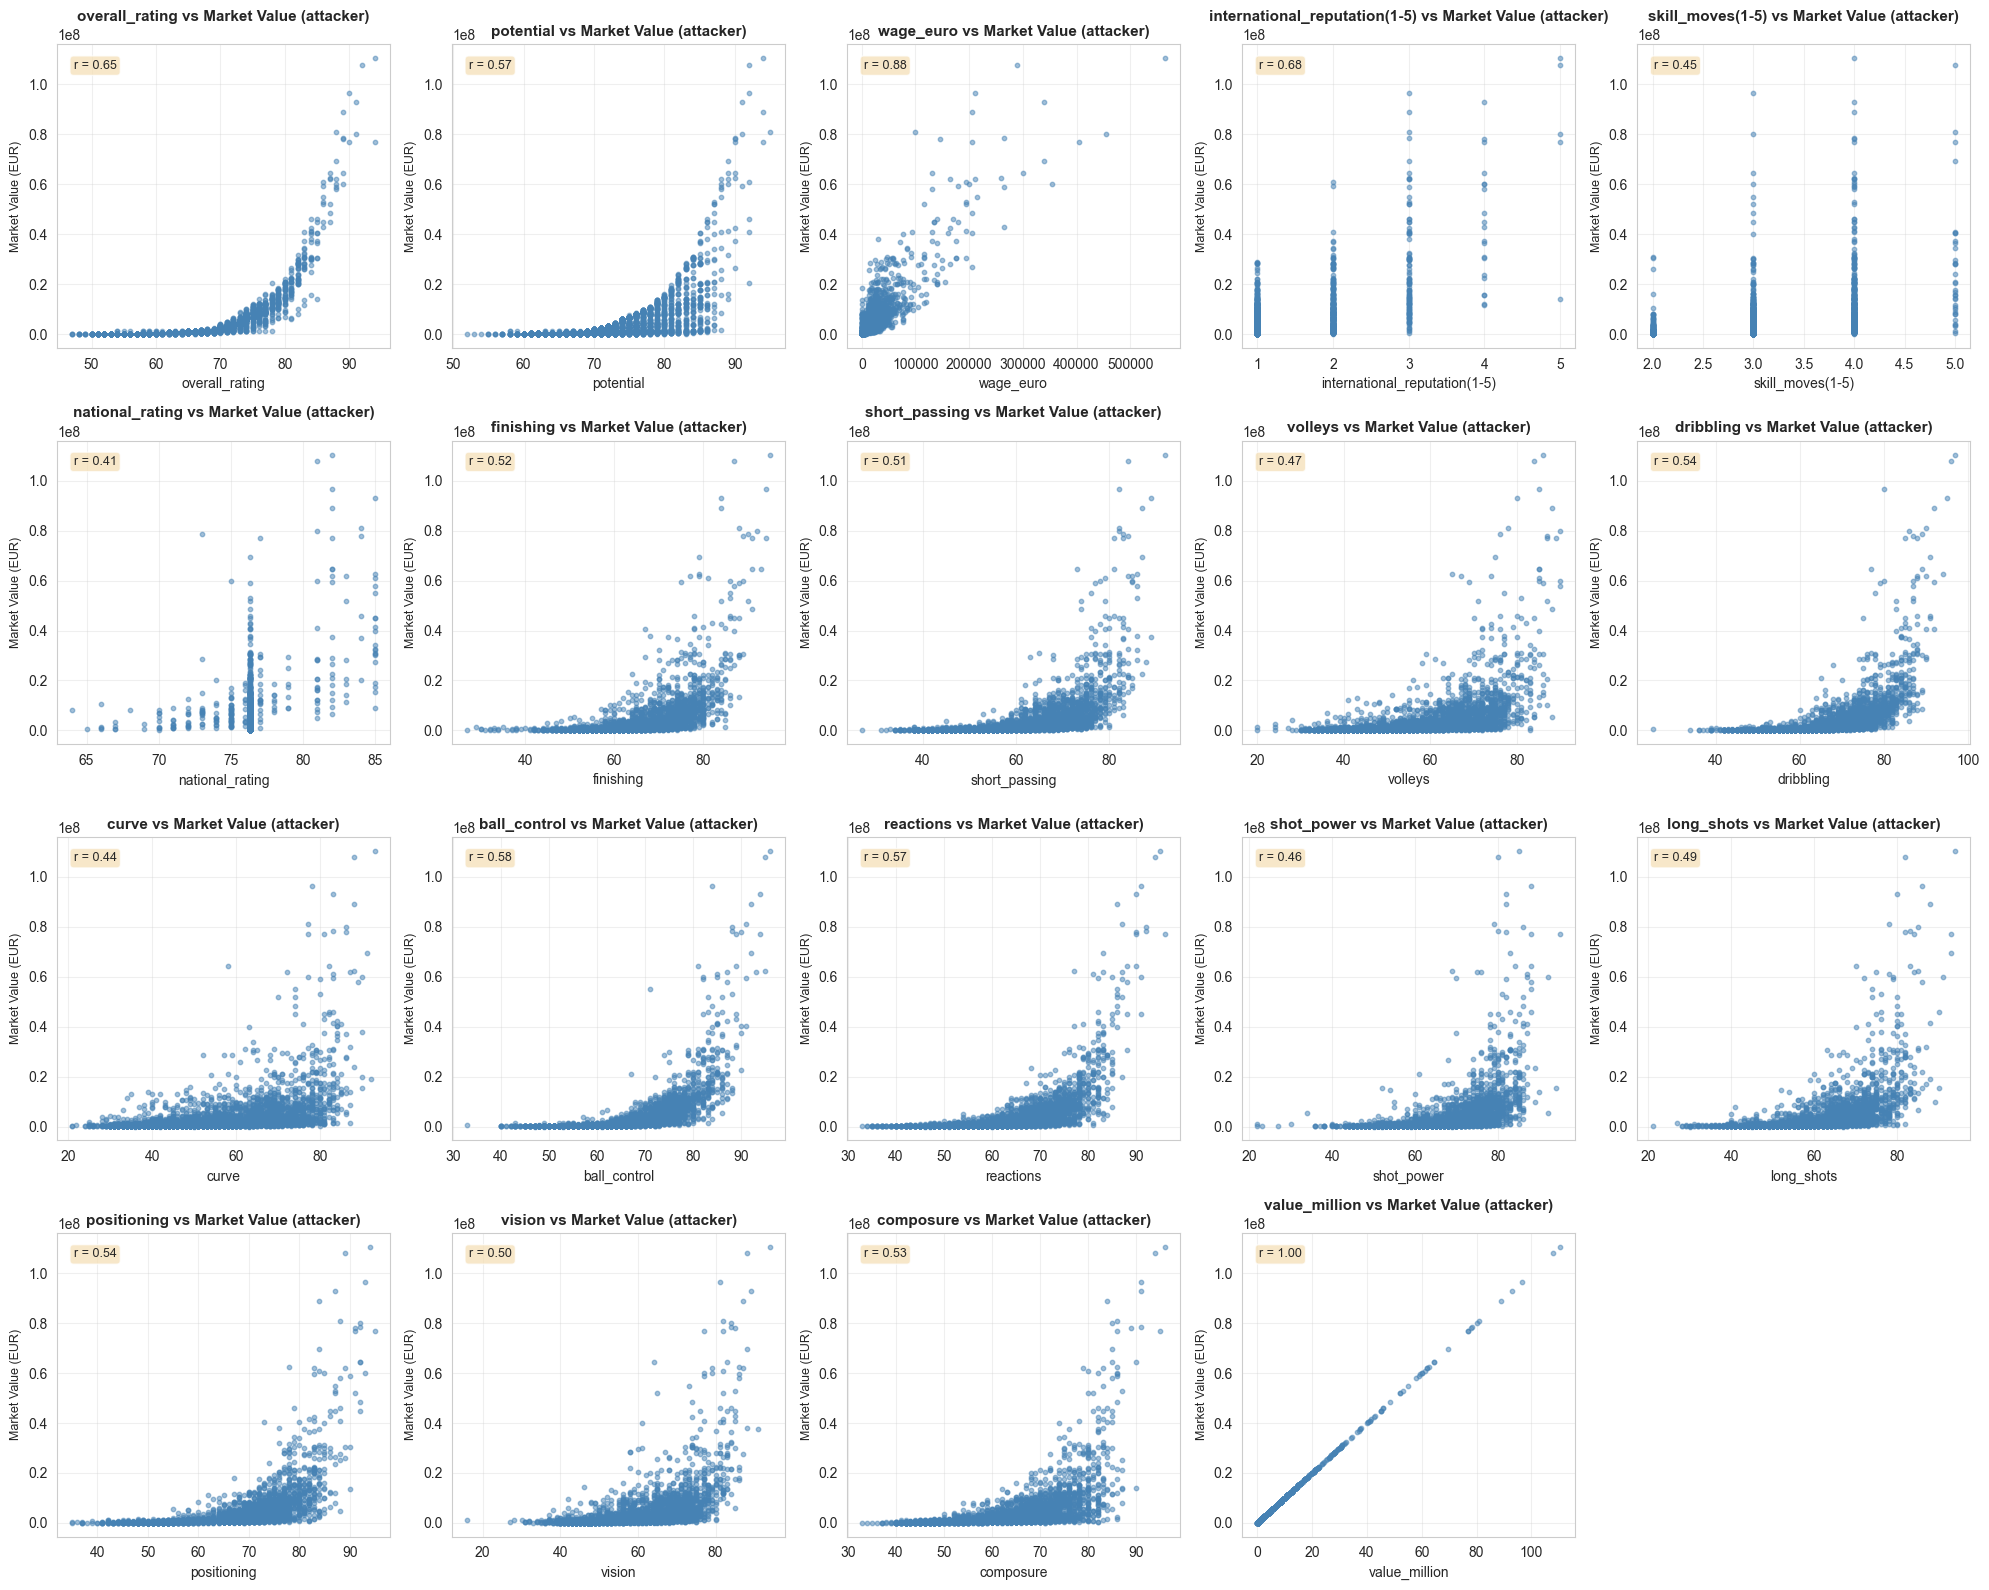

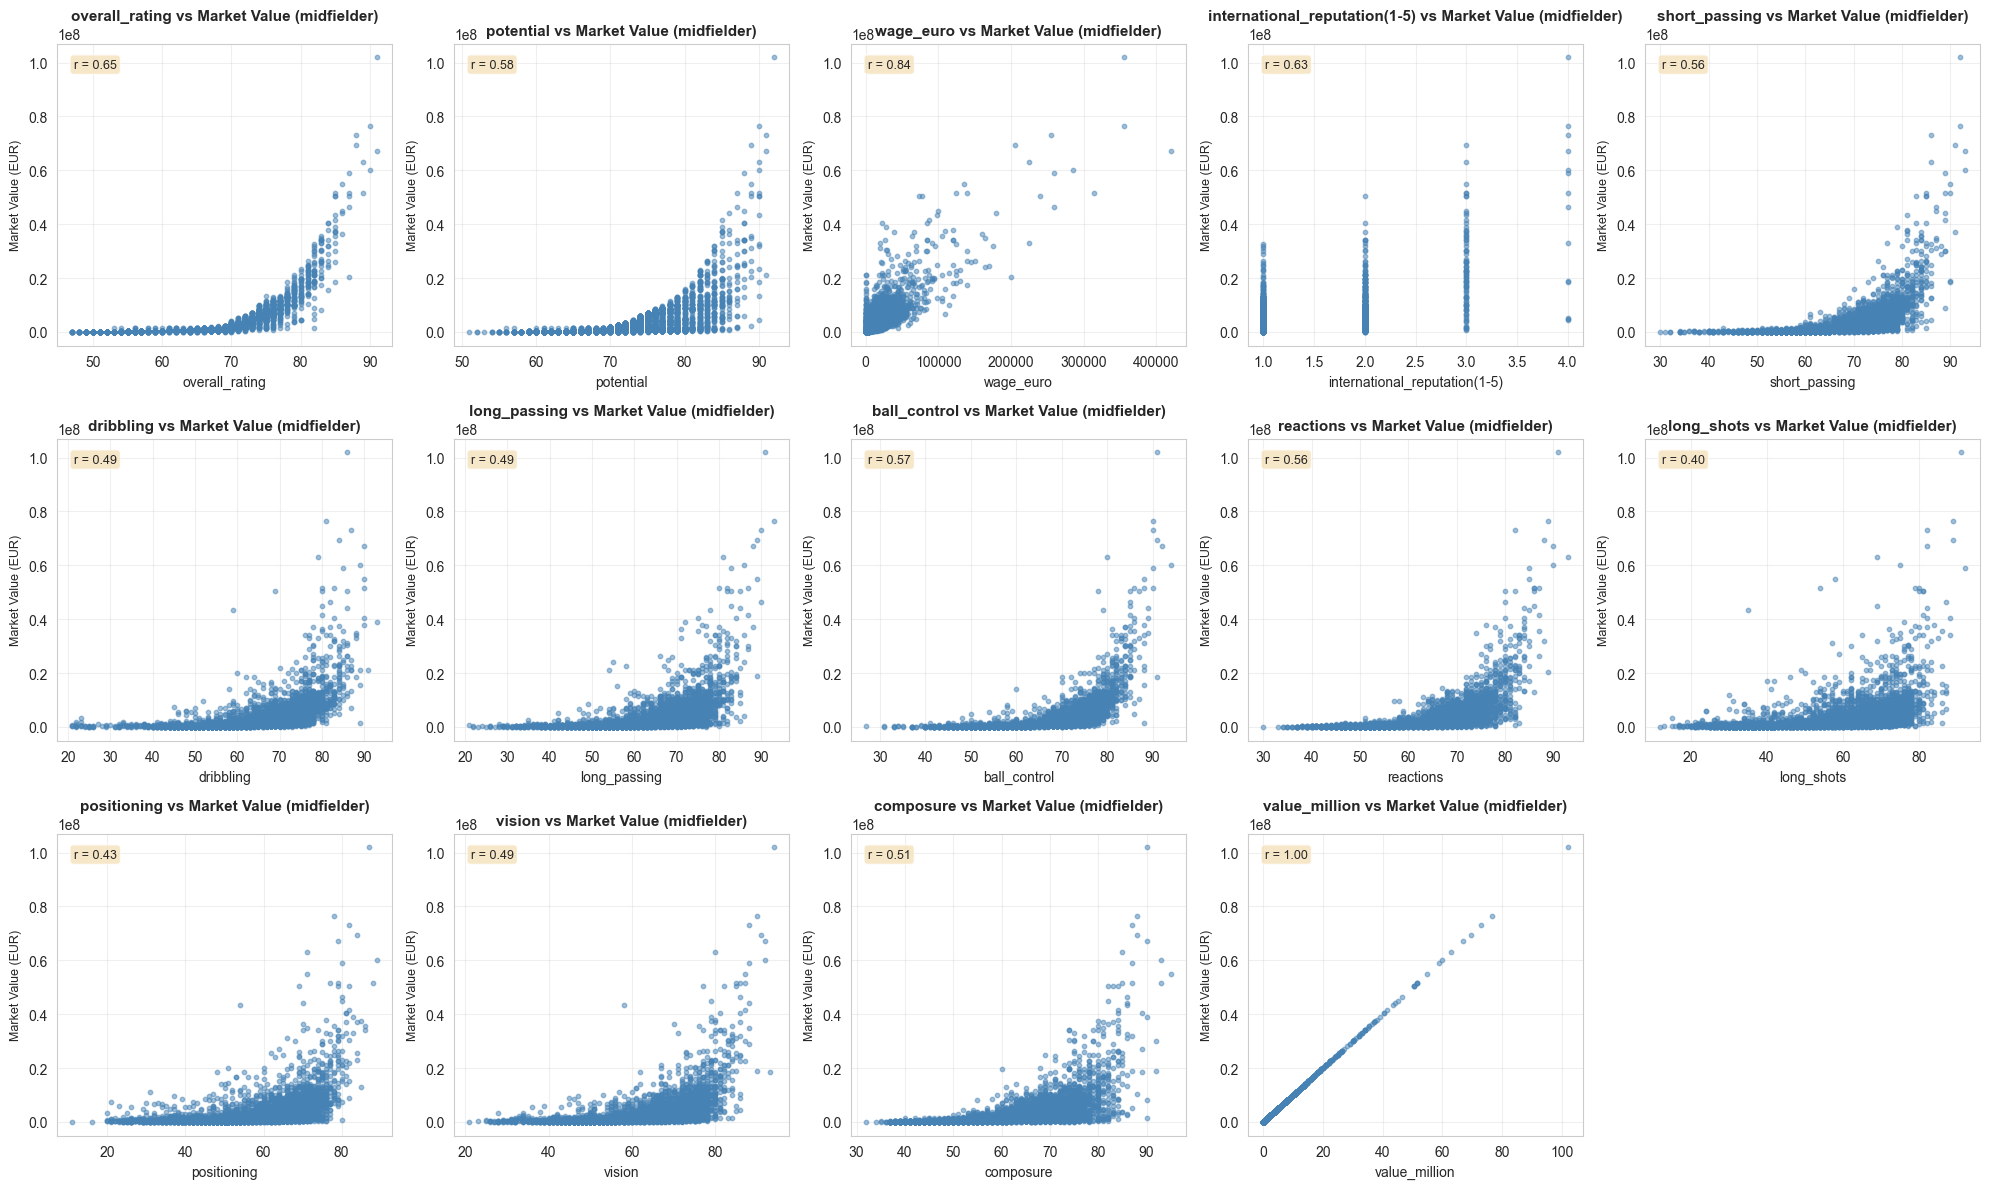

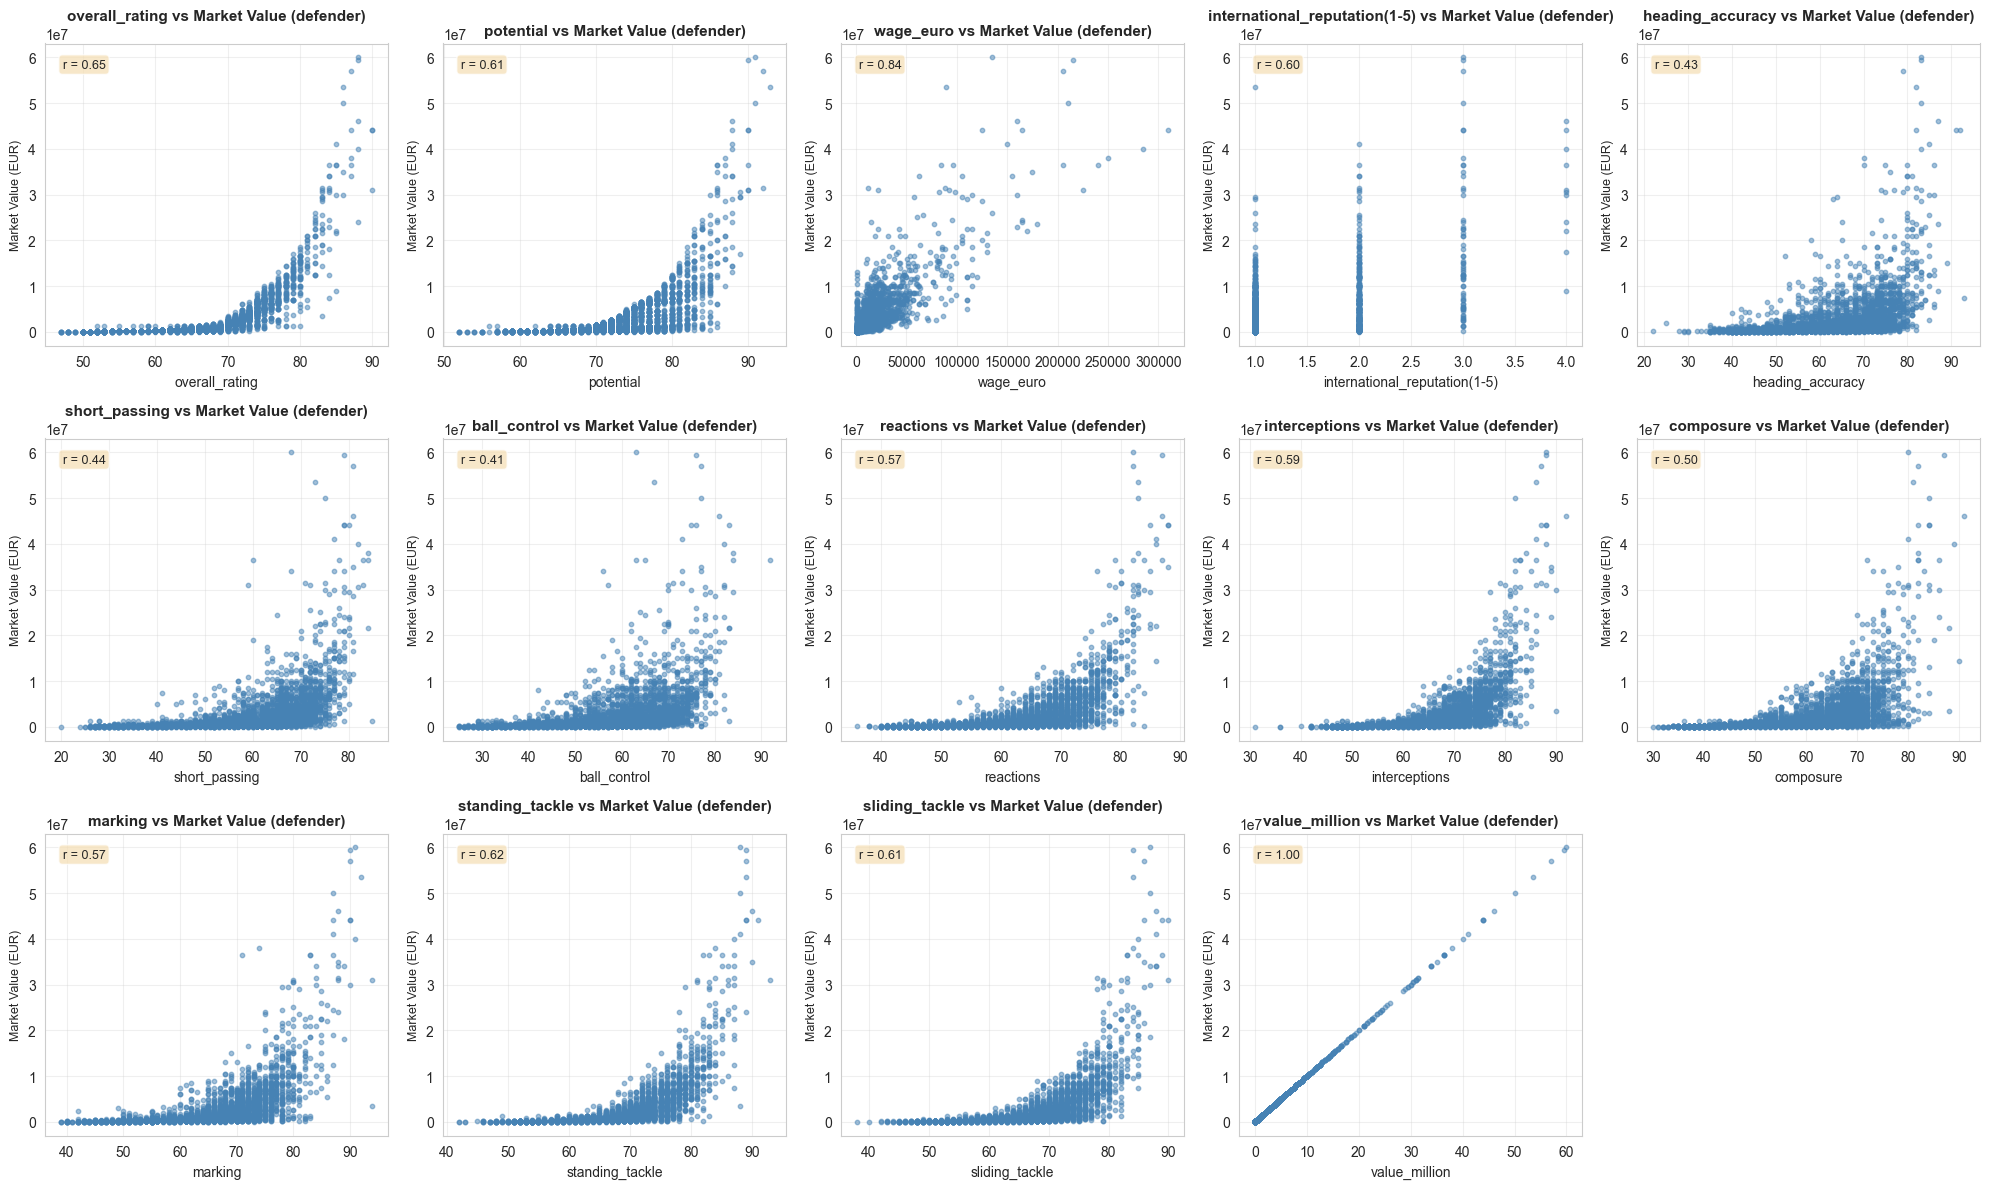

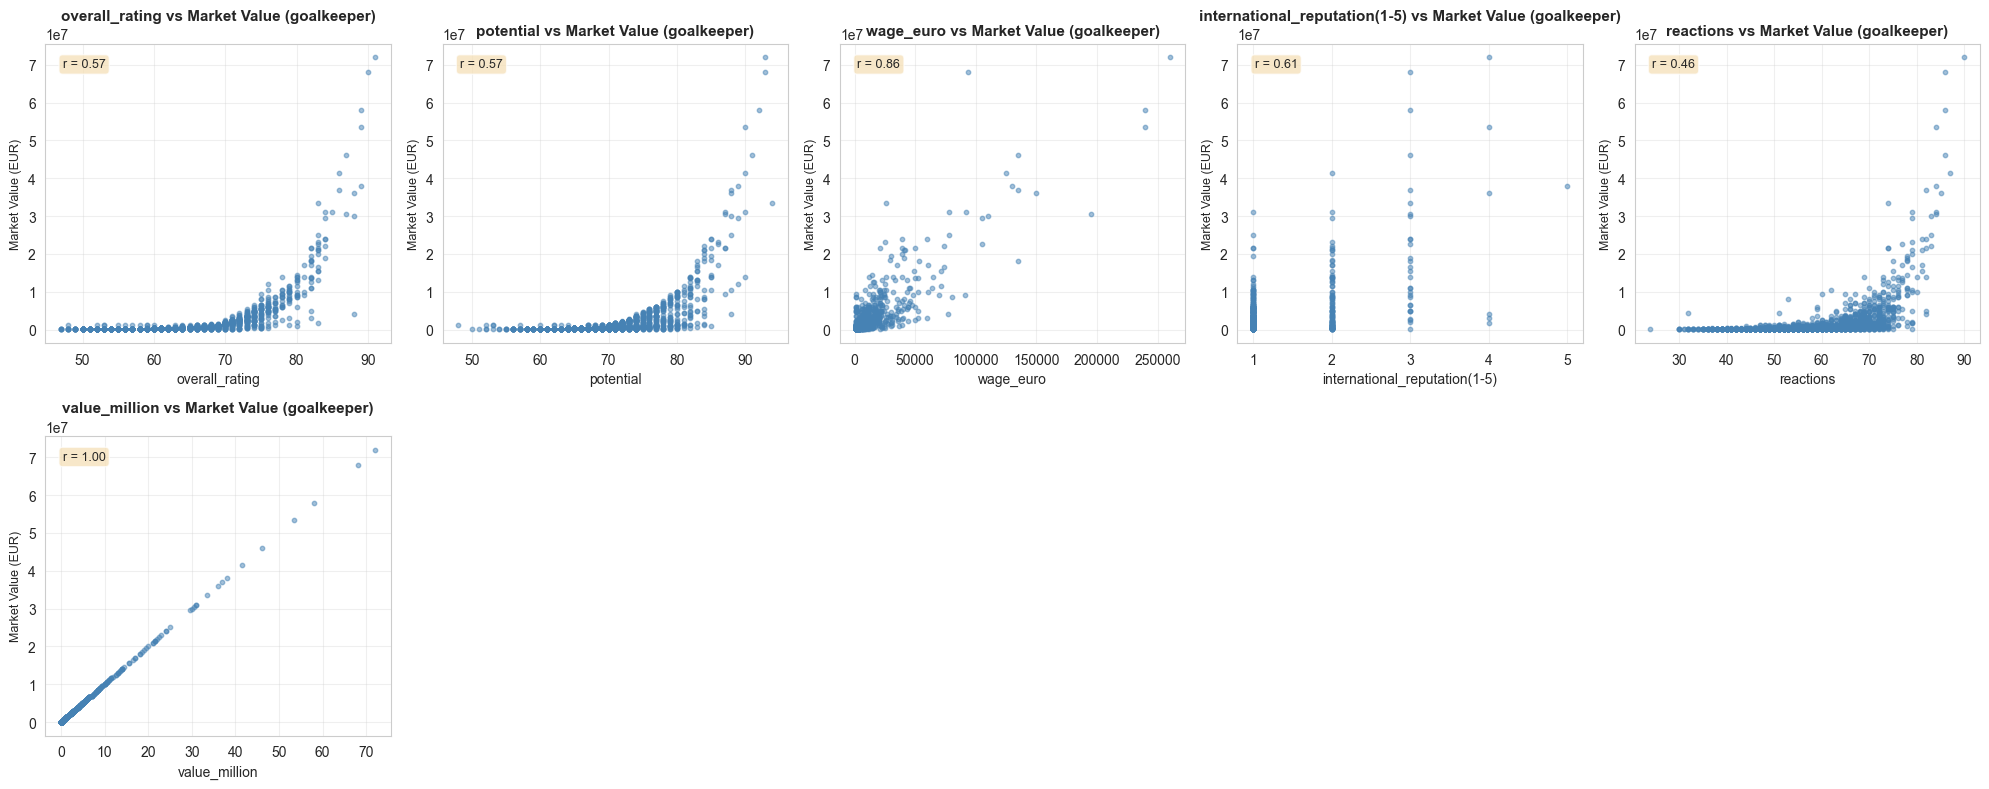

In [257]:
# Select numeric variables correctly and compute correlations robustly
variables = df.select_dtypes(include=[np.number]).columns.tolist()

# Remove the target if present
if 'value_euro' in variables:
    variables.remove('value_euro')

# Ensure categories exist
catgs = ['attacker', 'midfielder', 'defender', 'goalkeeper']

for catg in catgs:
    dt = df[df['position_category'] == catg].copy()
    if dt.empty:
        print(f'No rows for category: {catg}')
        continue

    essential_variables = []
    for var in variables:
        # compute correlation safely (skip non-numeric or constant columns)
        if var not in dt.columns:
            continue
        try:
            corr = dt[var].corr(dt['value_euro'])
        except Exception:
            corr = 0
        if pd.notna(corr) and abs(corr) >= 0.4:
            essential_variables.append(var)

    features = essential_variables

    n_features = len(features)
    if n_features == 0:
        print(f"No features with |corr| >= 0.4 for {catg}")
        continue

    n_cols = 5
    n_rows = int(np.ceil(n_features / n_cols))

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 4))
    axes = axes.ravel()

    for idx, var in enumerate(features):
        axes[idx].scatter(dt[var], dt['value_euro'], alpha=0.5, s=10, color='steelblue')
        axes[idx].set_xlabel(var, fontsize=10)
        axes[idx].set_ylabel('Market Value (EUR)', fontsize=9)
        axes[idx].set_title(f'{var} vs Market Value ({catg})', fontsize=11, fontweight='bold')
        axes[idx].grid(alpha=0.3)
        corr = dt[var].corr(dt['value_euro'])
        axes[idx].text(0.05, 0.95, f'r = {corr:.2f}', 
                      transform=axes[idx].transAxes, 
                      verticalalignment='top', 
                      bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.7), 
                      fontsize=9)

    # Hide unused subplots
    for idx in range(n_features, len(axes)):
        axes[idx].set_visible(False)

    plt.tight_layout()
    plt.savefig(f'{catg}_features_vs_market_value.png', dpi=300, bbox_inches='tight')
    plt.show()

In [258]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import xgboost as xgb

# Dictionary to store models for each position
position_models = {}
results = {}

# *** AJOUTEZ CES LIGNES ICI ***
# Exclude target variable and its variants from features
variables_to_check = [var for var in variables if var not in ['value_euro', 'value_million']]
# *** FIN DE L'AJOUT ***

for catg in catgs:
    print(f"\n{'='*50}")
    print(f"Building model for: {catg.upper()}")
    print(f"{'='*50}")
    
    # Filter data for this position
    dt = df[df['position_category'] == catg].copy()
    
    # Feature selection based on absolute correlation (robust to sign)
    essential_variables = []
    for var in variables_to_check:  # *** CHANGEZ 'variables' en 'variables_to_check' ***
        if var not in dt.columns:
            continue
        try:
            corr = dt[var].corr(dt['value_euro'])
        except Exception:
            corr = 0
        if pd.notna(corr) and abs(corr) >= 0.4:
            essential_variables.append(var)
    
    features = [var for var in essential_variables if var != 'value_euro']
    
    if len(features) == 0:
        print(f"No features with correlation ≥ 0.4 for {catg}")
        continue
    
    print(f"Selected features ({len(features)}): {features}")
    
    # Prepare X and y
    X = dt[features]
    y = dt['value_euro']
    
    # Handle missing values if any
    X = X.fillna(X.median())
    
    # Train-test split (80-20)
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )
    
    # Feature scaling (important for some models)
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Dictionary to store models and their performance
    models = {
        'Linear Regression': LinearRegression(),
        'Ridge Regression': Ridge(alpha=1.0),
        'Lasso Regression': Lasso(alpha=1.0),
        'Random Forest': RandomForestRegressor(
            n_estimators=100, 
            max_depth=10,
            random_state=42,
            n_jobs=-1
        ),
        'Gradient Boosting': GradientBoostingRegressor(
            n_estimators=100,
            max_depth=5,
            random_state=42
        ),
        'XGBoost': xgb.XGBRegressor(
            n_estimators=100,
            max_depth=5,
            learning_rate=0.1,
            random_state=42
        )
    }
    
    # Train and evaluate each model
    position_results = {}
    
    for name, model in models.items():
        print(f"\nTraining {name}...")
        
        # Use scaled data for linear models, original for tree-based
        if name in ['Linear Regression', 'Ridge Regression', 'Lasso Regression']:
            X_tr, X_te = X_train_scaled, X_test_scaled
        else:
            X_tr, X_te = X_train, X_test
        
        # Train model
        model.fit(X_tr, y_train)
        
        # Predictions
        y_pred_train = model.predict(X_tr)
        y_pred_test = model.predict(X_te)
        
        # Cross-validation score (5-fold)
        cv_scores = cross_val_score(
            model, X_tr, y_train, 
            cv=5, 
            scoring='r2',
            n_jobs=-1
        )
        
        # Calculate metrics
        train_r2 = r2_score(y_train, y_pred_train)
        test_r2 = r2_score(y_test, y_pred_test)
        test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
        test_mae = mean_absolute_error(y_test, y_pred_test)
        
        # Store results
        position_results[name] = {
            'train_r2': train_r2,
            'test_r2': test_r2,
            'cv_r2_mean': cv_scores.mean(),
            'cv_r2_std': cv_scores.std(),
            'test_rmse': test_rmse,
            'test_mae': test_mae,
            'model': model,
            'scaler': scaler if name in ['Linear Regression', 'Ridge Regression', 'Lasso Regression'] else None
        }
        
        print(f"  Train R²: {train_r2:.4f}")
        print(f"  Test R²: {test_r2:.4f}")
        print(f"  CV R² (mean ± std): {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")
        print(f"  Test RMSE: €{test_rmse:,.0f}")
        print(f"  Test MAE: €{test_mae:,.0f}")
    
    # Store results for this position
    results[catg] = position_results
    
    # Select best model based on test R²
    best_model_name = max(position_results, key=lambda x: position_results[x]['test_r2'])
    position_models[catg] = {
        'name': best_model_name,
        'model': position_results[best_model_name]['model'],
        'scaler': position_results[best_model_name]['scaler'],
        'features': features
    }
    
    print(f"\n🏆 Best model for {catg}: {best_model_name}")
    print(f"   Test R²: {position_results[best_model_name]['test_r2']:.4f}")

# Summary comparison across positions
print(f"\n{'='*80}")
print("SUMMARY: Best Models by Position")
print(f"{'='*80}")

summary_data = []
for catg in catgs:
    if catg in position_models:
        best = position_models[catg]['name']
        r2 = results[catg][best]['test_r2']
        rmse = results[catg][best]['test_rmse']
        mae = results[catg][best]['test_mae']
        summary_data.append({
            'Position': catg.capitalize(),
            'Best Model': best,
            'Test R²': f"{r2:.4f}",
            'RMSE': f"€{rmse:,.0f}",
            'MAE': f"€{mae:,.0f}"
        })

import pandas as pd
summary_df = pd.DataFrame(summary_data)
print(summary_df.to_string(index=False))


Building model for: ATTACKER
Selected features (18): ['overall_rating', 'potential', 'wage_euro', 'international_reputation(1-5)', 'skill_moves(1-5)', 'national_rating', 'finishing', 'short_passing', 'volleys', 'dribbling', 'curve', 'ball_control', 'reactions', 'shot_power', 'long_shots', 'positioning', 'vision', 'composure']

Training Linear Regression...
  Train R²: 0.8407
  Test R²: 0.7954
  CV R² (mean ± std): 0.8326 ± 0.0317
  Test RMSE: €2,713,460
  Test MAE: €1,584,675

Training Ridge Regression...
  Train R²: 0.8407
  Test R²: 0.7955
  CV R² (mean ± std): 0.8326 ± 0.0317
  Test RMSE: €2,713,172
  Test MAE: €1,584,203

Training Lasso Regression...
  Train R²: 0.8407
  Test R²: 0.7954
  CV R² (mean ± std): 0.8326 ± 0.0317
  Test RMSE: €2,713,460
  Test MAE: €1,584,673

Training Random Forest...
  Train R²: 0.9960
  Test R²: 0.9791
  CV R² (mean ± std): 0.9709 ± 0.0028
  Test RMSE: €867,745
  Test MAE: €278,420

Training Gradient Boosting...
  Train R²: 0.9991
  Test R²: 0.9793
 


Top 10 features - ATTACKER
                          feature  importance
0                  overall_rating    0.897370
1                       potential    0.040928
17                      composure    0.015392
9                       dribbling    0.009609
2                       wage_euro    0.005465
3   international_reputation(1-5)    0.004470
14                     long_shots    0.003313
7                   short_passing    0.003118
11                   ball_control    0.003024
8                         volleys    0.002935


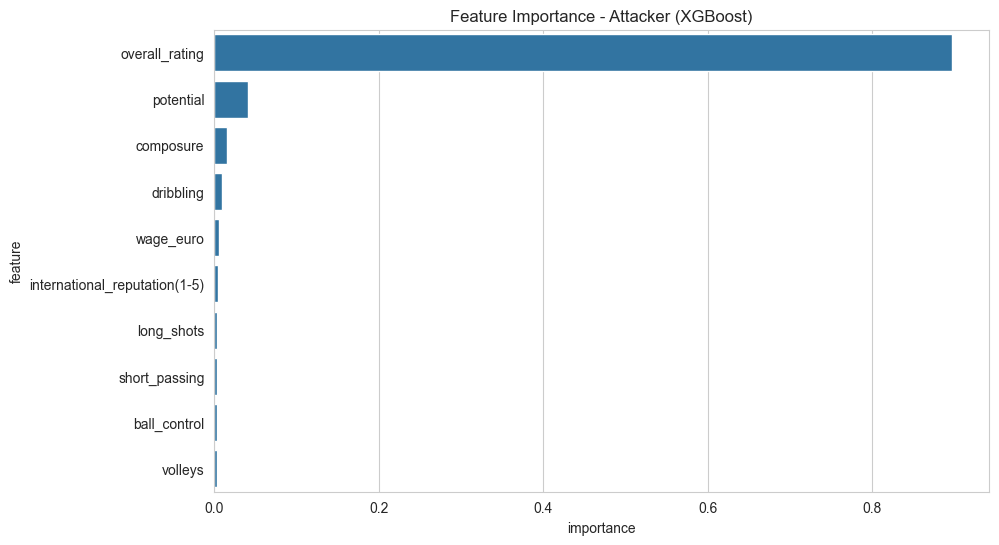


Top 10 features - MIDFIELDER
           feature  importance
0   overall_rating    0.858876
1        potential    0.076228
2        wage_euro    0.015129
6     long_passing    0.007878
11          vision    0.006999
12       composure    0.006255
9       long_shots    0.005834
10     positioning    0.005762
7     ball_control    0.004627
8        reactions    0.004247


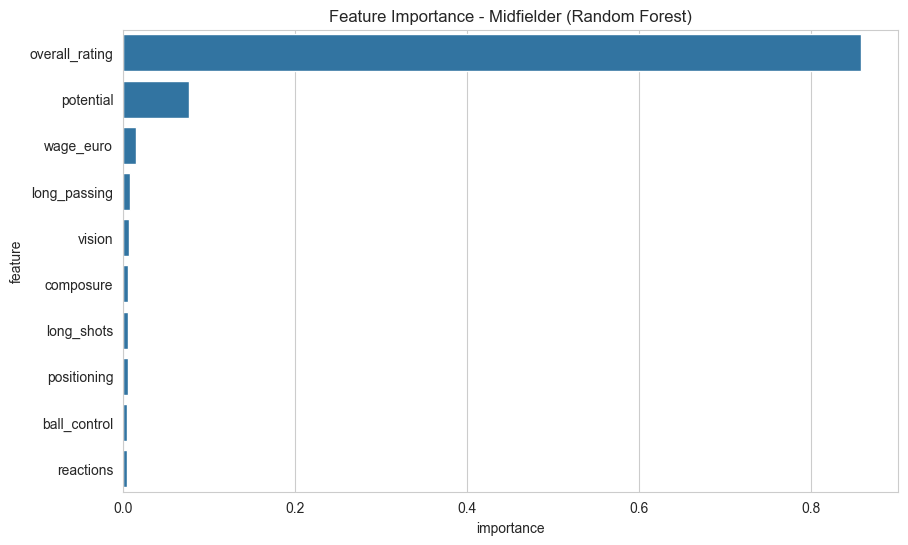


Top 10 features - DEFENDER
                          feature  importance
0                  overall_rating    0.807519
1                       potential    0.151553
10                        marking    0.011870
2                       wage_euro    0.005951
9                       composure    0.004049
3   international_reputation(1-5)    0.003773
12                 sliding_tackle    0.003090
4                heading_accuracy    0.002733
8                   interceptions    0.002676
7                       reactions    0.002489


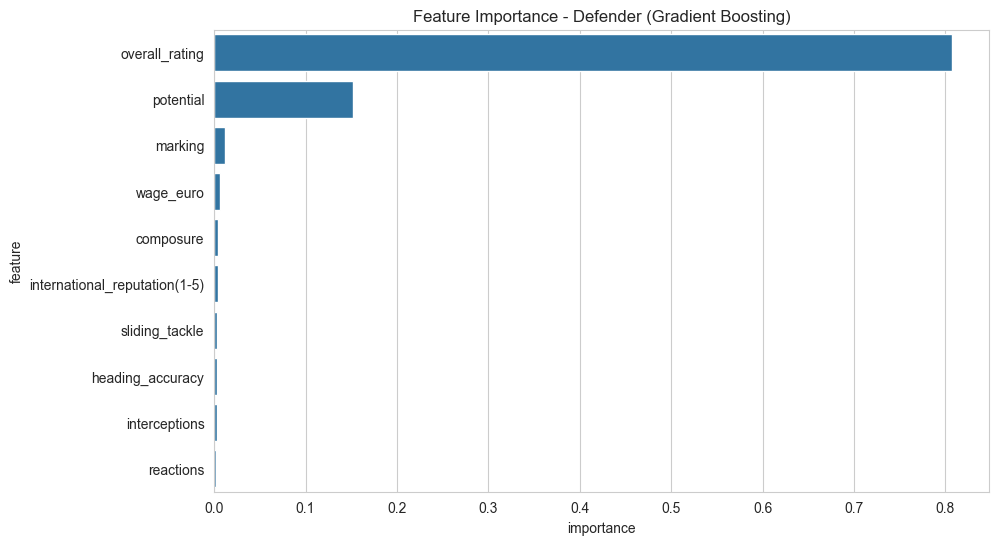


Top 10 features - GOALKEEPER
                         feature  importance
0                 overall_rating    0.664910
2                      wage_euro    0.125773
4                      reactions    0.105571
1                      potential    0.097525
3  international_reputation(1-5)    0.006222


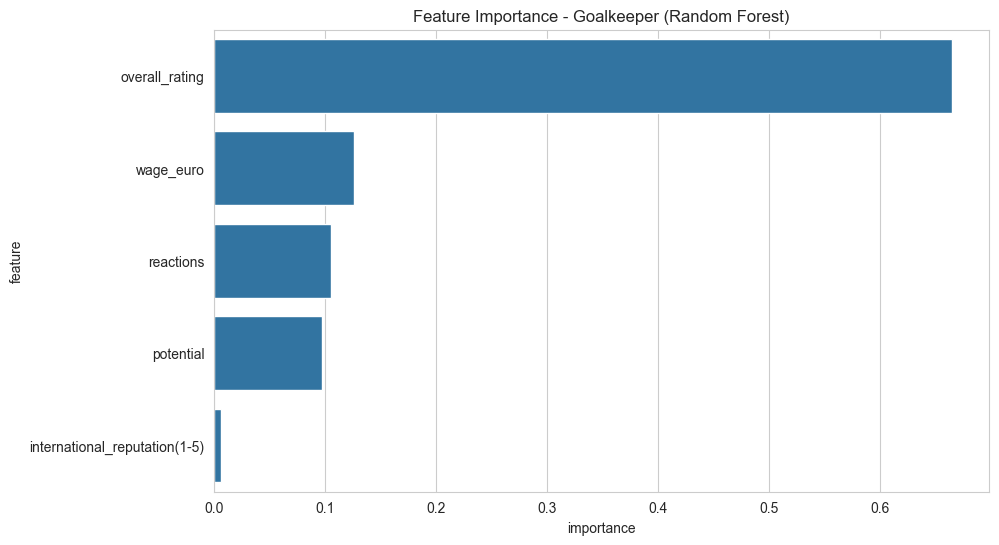

In [259]:
import matplotlib.pyplot as plt
import seaborn as sns

for catg in catgs:
    if catg in position_models:
        best_name = position_models[catg]['name']
        model = position_models[catg]['model']
        
        if 'Random Forest' in best_name or 'Gradient Boosting' in best_name:
            importances = model.feature_importances_
        elif 'XGBoost' in best_name:
            importances = model.feature_importances_
        else:
            continue
        
        feat_imp = pd.DataFrame({
            'feature': position_models[catg]['features'],
            'importance': importances
        }).sort_values('importance', ascending=False)
        
        print(f"\nTop 10 features - {catg.upper()}")
        print(feat_imp.head(10))
        
        # Plot
        plt.figure(figsize=(10,6))
        sns.barplot(data=feat_imp.head(10), x='importance', y='feature')
        plt.title(f'Feature Importance - {catg.capitalize()} ({best_name})')
        plt.show()

In [260]:
import joblib
for catg, info in position_models.items():
    joblib.dump({
        'model': info['model'],
        'scaler': info['scaler'],
        'features': info['features']
    }, f'best_model_{catg}.pkl')
